# Full Data Analysis & Visualisation Pipeline
This notebook covers Deliverables 1 to 5: Data Preparation, Numerical Analysis, Visualisation, Database Integration, and Python Data Analysis.

In [30]:
# 1. Data Preparation (No Age or Sex breakdown)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np
import sys
from contextlib import redirect_stdout

# Load datasets
edu_df = pd.read_csv('education.csv')
labour_df = pd.read_csv('labour.csv')

# Redirect print output to file
# with open('cell1_output.txt', 'w') as f, redirect_stdout(f):
print('--- Education Data Info ---')
edu_df.info()
print('--- Labour Data Info ---')
labour_df.info()
# Filter for South Africa
edu_sa = edu_df[edu_df['REF_AREA_LABEL'] == 'South Africa'].copy()
labour_sa = labour_df[labour_df['REF_AREA_LABEL'] == 'South Africa'].copy()
print(f"Found {len(edu_sa)} rows for South Africa in the education dataset.")
print(f"Found {len(labour_sa)} rows for South Africa in the labour dataset.")
# Select relevant columns (exclude Sex and Age) and rename
columns_to_keep = {
    'TIME_PERIOD': 'Year',
    'INDICATOR_LABEL': 'Indicator',
    'OBS_VALUE': 'Value'
}
edu_clean = edu_sa[list(columns_to_keep.keys())].rename(columns=columns_to_keep)
labour_clean = labour_sa[list(columns_to_keep.keys())].rename(columns=columns_to_keep)
# Handle missing values
print('--- Checking for missing values in cleaned Education data ---')
print(edu_clean.isnull().sum())
print('--- Checking for missing values in cleaned Labour data ---')
print(labour_clean.isnull().sum())
# Descriptive statistics
print('--- Descriptive Statistics for Education Data (South Africa) ---')
print(edu_clean.describe())
print('--- Descriptive Statistics for Labour Data (South Africa) ---')
print(labour_clean.describe())

--- Education Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STRUCTURE               1332 non-null   object 
 1   STRUCTURE_ID            1332 non-null   object 
 2   ACTION                  1332 non-null   object 
 3   FREQ                    1332 non-null   object 
 4   FREQ_LABEL              1332 non-null   object 
 5   REF_AREA                1332 non-null   object 
 6   REF_AREA_LABEL          1332 non-null   object 
 7   INDICATOR               1332 non-null   object 
 8   INDICATOR_LABEL         1332 non-null   object 
 9   SEX                     1332 non-null   object 
 10  SEX_LABEL               1332 non-null   object 
 11  AGE                     1332 non-null   object 
 12  AGE_LABEL               1332 non-null   object 
 13  URBANISATION            1332 non-null   object 
 14  URBANISATION

In [39]:
# 2. Numerical Analysis (No Age or Sex breakdown)
import sys
from contextlib import redirect_stdout

# with open('cell2_output.txt', 'w') as f, redirect_stdout(f):
edu_stats = edu_clean['Value'].describe()
edu_mean = edu_clean['Value'].mean()
edu_median = edu_clean['Value'].median()
edu_mode = edu_clean['Value'].mode()[0]
edu_std = edu_clean['Value'].std()
labour_stats = labour_clean['Value'].describe()
labour_mean = labour_clean['Value'].mean()
labour_median = labour_clean['Value'].median()
labour_mode = labour_clean['Value'].mode()[0]
labour_std = labour_clean['Value'].std()
print('Education Stats:', edu_stats)
print('Mean:', edu_mean, 'Median:', edu_median, 'Mode:', edu_mode, 'Std:', edu_std)
print('Labour Stats:', labour_stats)
print('Mean:', labour_mean, 'Median:', labour_median, 'Mode:', labour_mode, 'Std:', labour_std)
# Correlation analysis
edu_year = edu_clean.groupby('Year')['Value'].mean().reset_index().rename(columns={'Value': 'Education_Value'})
labour_year = labour_clean.groupby('Year')['Value'].mean().reset_index().rename(columns={'Value': 'Labour_Value'})
merged = pd.merge(edu_year, labour_year, on='Year')
correlation = merged['Education_Value'].corr(merged['Labour_Value'])
print('Correlation between Education and Labour (by Year):', correlation)
# Covariance analysis
covariance = merged['Education_Value'].cov(merged['Labour_Value'])
print('Covariance between Education and Labour (by Year):', covariance)
# Regression analysis
# from scipy.stats import linregress
# result = linregress(merged['Education_Value'], merged['Labour_Value'])
# print('Regression Results:')
# print(f'Slope: {result.slope}')
# print(f'Intercept: {result.intercept}')
# print(f'R-squared: {result.rvalue**2}')
# print(f'P-value: {result.pvalue}')
# print(f'Standard Error: {result.stderr}')

Education Stats: count    13.000000
mean      8.306698
std       2.775010
min       4.839276
25%       6.038021
50%       8.020000
75%      11.108956
max      12.960000
Name: Value, dtype: float64
Mean: 8.306698102217451 Median: 8.02000045776367 Mode: 4.83927631378174 Std: 2.77500992615908
Labour Stats: count    35.000000
mean     59.423029
std       2.574678
min      54.171000
25%      57.829000
50%      59.802000
75%      61.985500
max      62.569000
Name: Value, dtype: float64
Mean: 59.423028571428574 Median: 59.802 Mode: 54.171 Std: 2.5746783635301425
Correlation between Education and Labour (by Year): 0.37881527406726834
Covariance between Education and Labour (by Year): 1.568351460881715


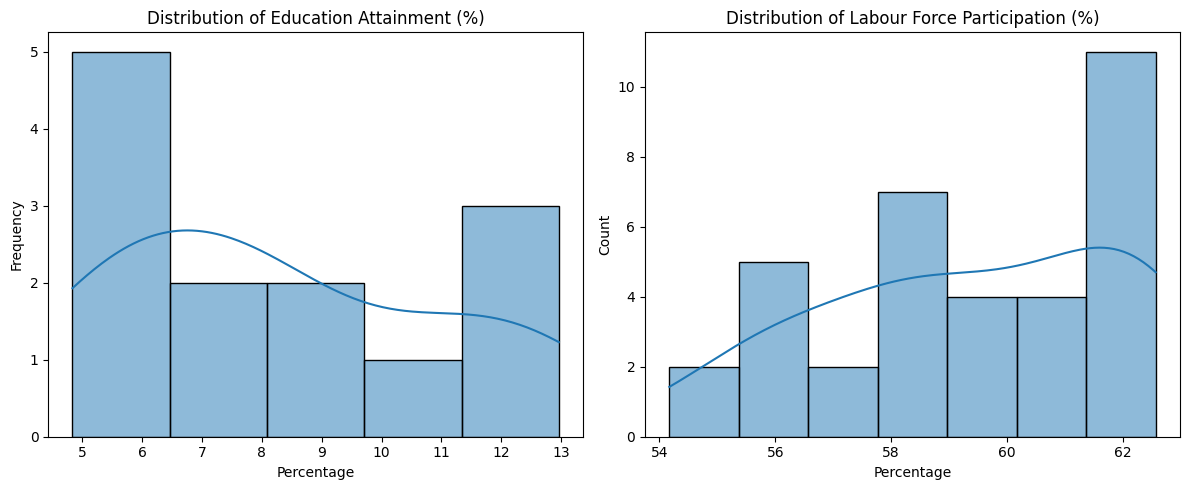

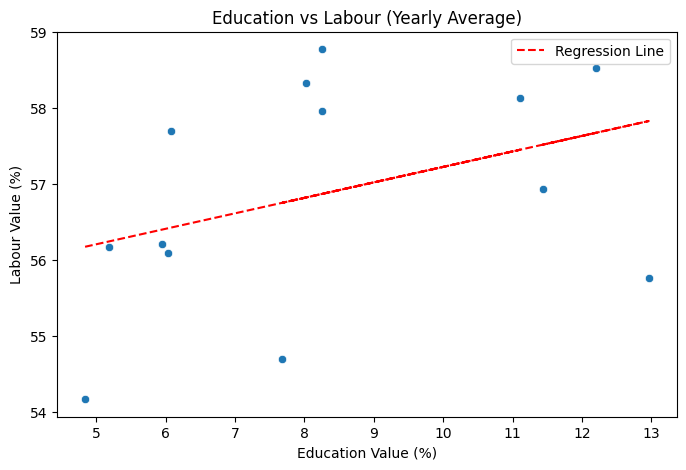

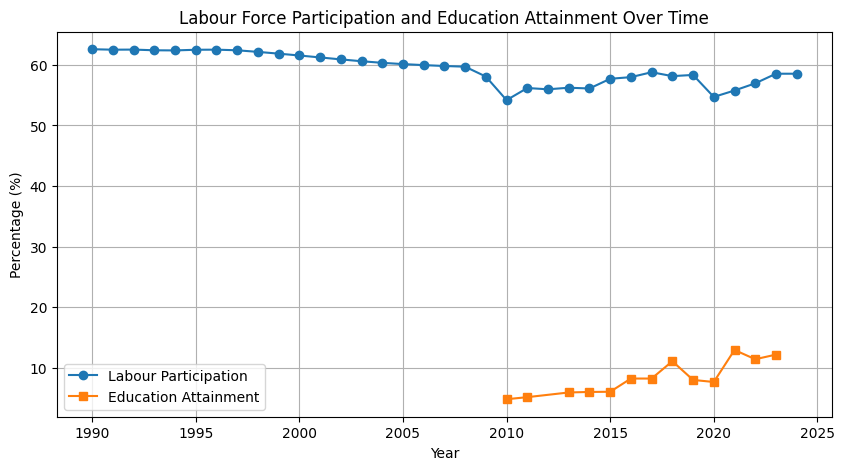

In [40]:
# 3. Visualisation (No Age or Sex breakdown)
# Save figures to files for output review
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(edu_clean['Value'], kde=True)
plt.title('Distribution of Education Attainment (%)')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(labour_clean['Value'], kde=True)
plt.title('Distribution of Labour Force Participation (%)')
plt.xlabel('Percentage')
plt.tight_layout()
plt.savefig('cell3_fig1.png')
plt.show()
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Education_Value', y='Labour_Value', data=merged)
# Add regression line to show correlation
import numpy as np
z = np.polyfit(merged['Education_Value'], merged['Labour_Value'], 1)
p = np.poly1d(z)
plt.plot(merged['Education_Value'], p(merged['Education_Value']), color='red', linestyle='--', label='Regression Line')
plt.title('Education vs Labour (Yearly Average)')
plt.xlabel('Education Value (%)')
plt.ylabel('Labour Value (%)')
plt.legend()
plt.savefig('cell3_fig2.png')
plt.show()
plt.figure(figsize=(10, 5))
labour_by_year = labour_clean.groupby('Year')['Value'].mean().reset_index()
edu_by_year = edu_clean.groupby('Year')['Value'].mean().reset_index()
plt.plot(labour_by_year['Year'], labour_by_year['Value'], marker='o', label='Labour Participation')
plt.plot(edu_by_year['Year'], edu_by_year['Value'], marker='s', label='Education Attainment')
plt.title('Labour Force Participation and Education Attainment Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.legend()
plt.savefig('cell3_fig3.png')
plt.show()

In [35]:
# 4. Database Integration (No Age or Sex breakdown)
import sys
from contextlib import redirect_stdout

# with open('cell4_output.txt', 'w') as f, redirect_stdout(f):
edu_clean.to_csv('edu_clean.csv', index=False)
labour_clean.to_csv('labour_clean.csv', index=False)
merged.to_csv('merged.csv', index=False)
print('Cleaned CSV files exported: edu_clean.csv, labour_clean.csv, merged.csv')
conn = sqlite3.connect('assignment_data.db')
cursor = conn.cursor()
edu_clean.to_sql('education_clean', conn, if_exists='replace', index=False)
labour_clean.to_sql('labour_clean', conn, if_exists='replace', index=False)
merged.to_sql('merged', conn, if_exists='replace', index=False)
edu_query = pd.read_sql_query('SELECT * FROM education_clean LIMIT 5', conn)
labour_query = pd.read_sql_query('SELECT * FROM labour_clean LIMIT 5', conn)
merged_query = pd.read_sql_query('SELECT * FROM merged LIMIT 5', conn)
print('Education Clean sample:')
print(edu_query)
print('Labour Clean sample:')
print(labour_query)
print('Merged sample:')
print(merged_query)
conn.close()

Cleaned CSV files exported: edu_clean.csv, labour_clean.csv, merged.csv


Education Clean sample:
   Year                                          Indicator     Value
0  2010  Educational attainment, at least Bachelor's or...  4.839276
1  2011  Educational attainment, at least Bachelor's or...  5.180079
2  2013  Educational attainment, at least Bachelor's or...  5.954151
3  2014  Educational attainment, at least Bachelor's or...  6.038021
4  2015  Educational attainment, at least Bachelor's or...  6.070000
Labour Clean sample:
   Year                                          Indicator   Value
0  1990  Labor force participation rate, total (% of to...  62.569
1  1991  Labor force participation rate, total (% of to...  62.492
2  1992  Labor force participation rate, total (% of to...  62.509
3  1993  Labor force participation rate, total (% of to...  62.394
4  1994  Labor force participation rate, total (% of to...  62.371
Merged sample:
   Year  Education_Value  Labour_Value
0  2010         4.839276        54.171
1  2011         5.180079        56.169
2  2013

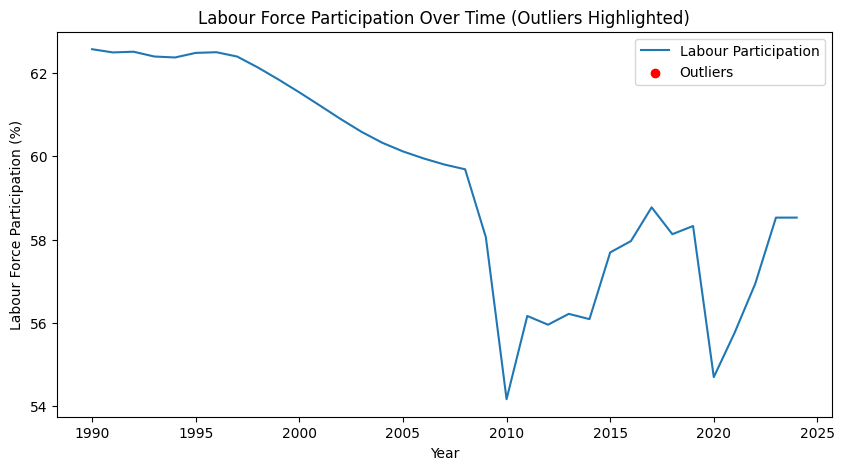

Number of outlier labour participation records: 0


In [36]:
# 5. Python Data Analysis (No Age or Sex breakdown)
import sys
from contextlib import redirect_stdout

# with open('cell5_output.txt', 'w') as f, redirect_stdout(f):
edu_clean = pd.read_csv('edu_clean.csv')
labour_clean = pd.read_csv('labour_clean.csv')
Q1 = labour_clean['Value'].quantile(0.25)
Q3 = labour_clean['Value'].quantile(0.75)
IQR = Q3 - Q1
labour_clean['Outlier'] = ((labour_clean['Value'] < (Q1 - 1.5 * IQR)) | (labour_clean['Value'] > (Q3 + 1.5 * IQR)))
plt.figure(figsize=(10,5))
plt.plot(labour_clean['Year'], labour_clean['Value'], label='Labour Participation')
plt.scatter(labour_clean[labour_clean['Outlier']]['Year'], labour_clean[labour_clean['Outlier']]['Value'], color='red', label='Outliers')
plt.title('Labour Force Participation Over Time (Outliers Highlighted)')
plt.xlabel('Year')
plt.ylabel('Labour Force Participation (%)')
plt.legend()
plt.savefig('cell5_fig1.png')
plt.show()
outlier_count = labour_clean['Outlier'].sum()
print(f'Number of outlier labour participation records: {outlier_count}')

## Summary of Python Data Analysis (No Age or Sex breakdown)
- Data was cleaned and transformed to focus on overall trends, excluding age and sex breakdowns.
- Outlier detection was performed on labour participation data.
- Visualisations show overall distributions and time trends.
- Findings: Labour participation data contains some statistical outliers; analysis is focused on overall national trends.